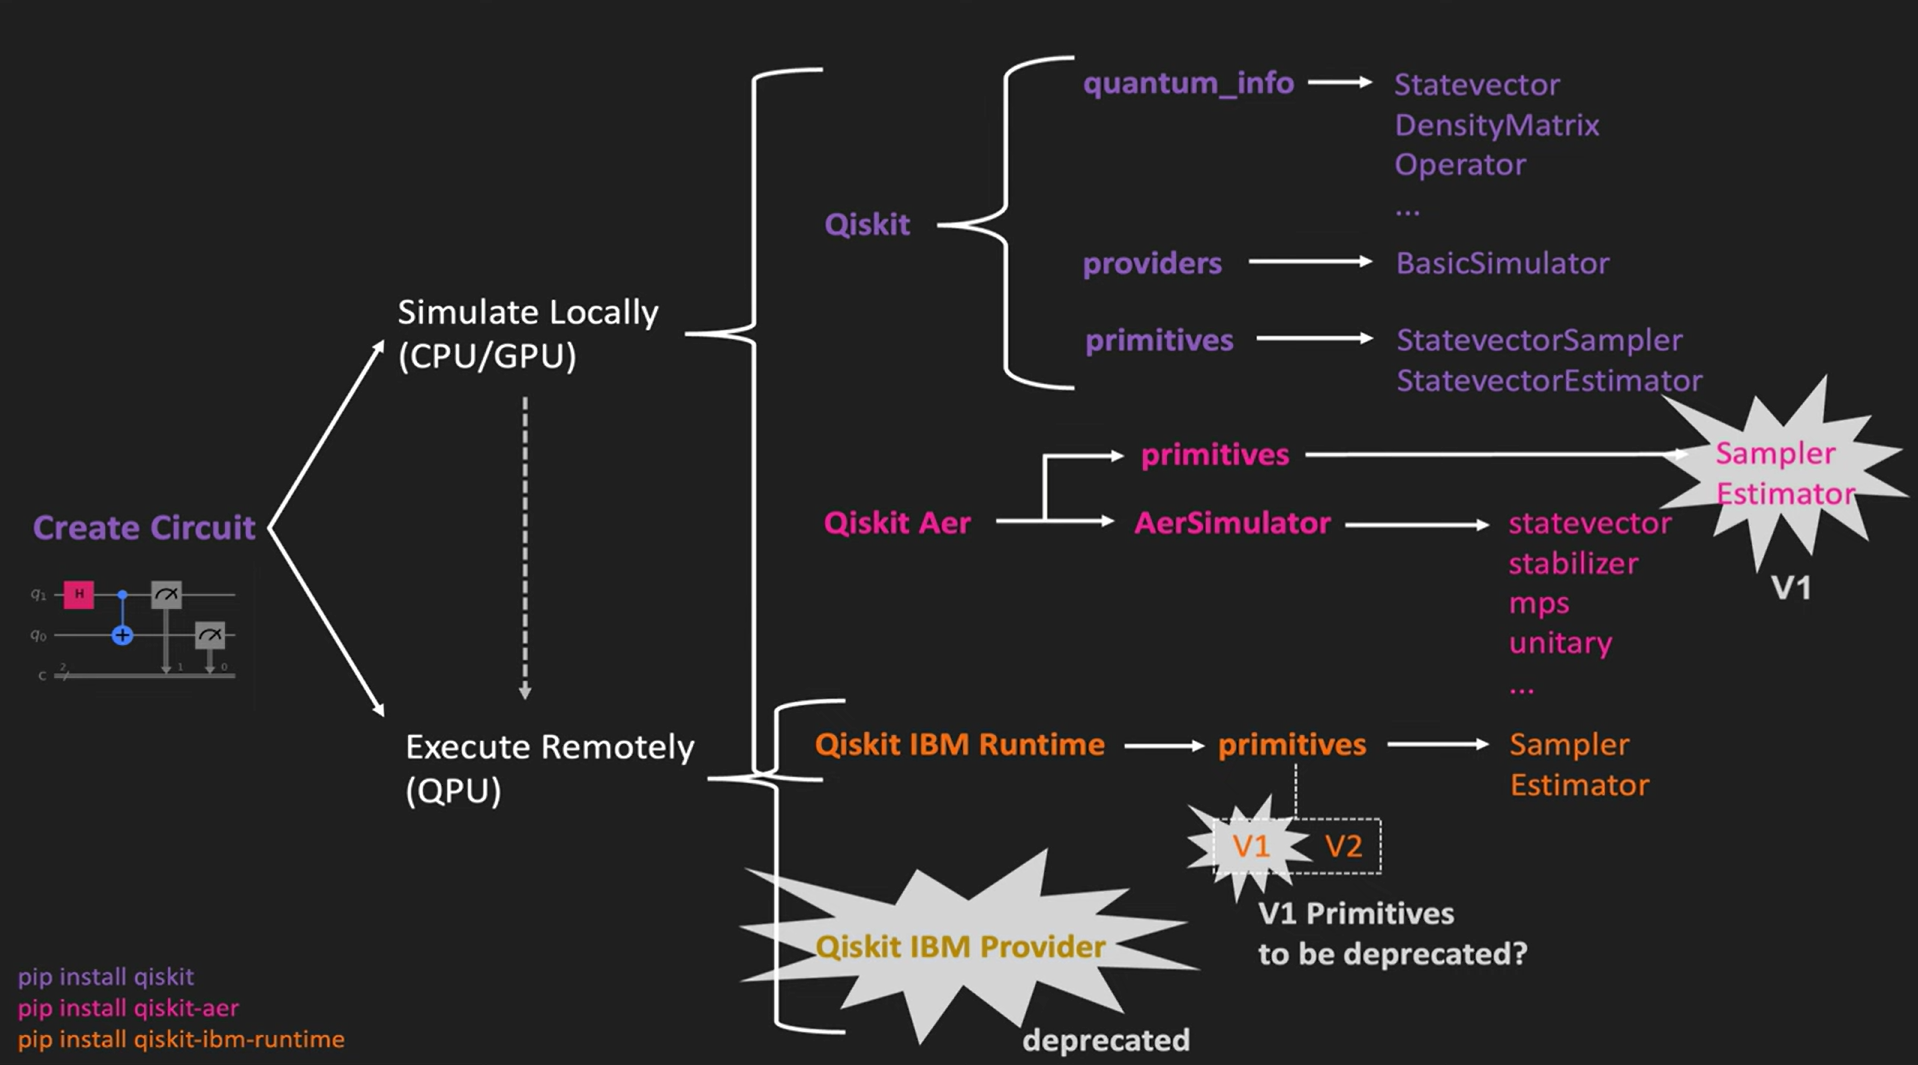

In [1]:
!pip install qiskit[visualization]
!pip install qiskit-aer
!pip install qiskit-ibm-runtime

## Quantum_info Module

When you wish to simulate the quantum properties of the output state of a circuit.

## Simulate circuits using StateVector Simulator

In [1]:
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi

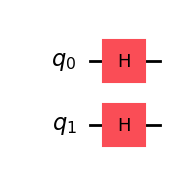

In [2]:
qc = QuantumCircuit(2)
qc.h([1,0])
qc.draw('mpl')

In [3]:
psi = qi.Statevector(qc)
psi.draw("latex")

<IPython.core.display.Latex object>

In [9]:
probs = psi.probabilities()
print(probs)

[0.25 0.25 0.25 0.25]


In [10]:
counts = psi.sample_counts(shots=1024)
print(counts)

{np.str_('00'): np.int64(245), np.str_('01'): np.int64(264), np.str_('10'): np.int64(252), np.str_('11'): np.int64(263)}


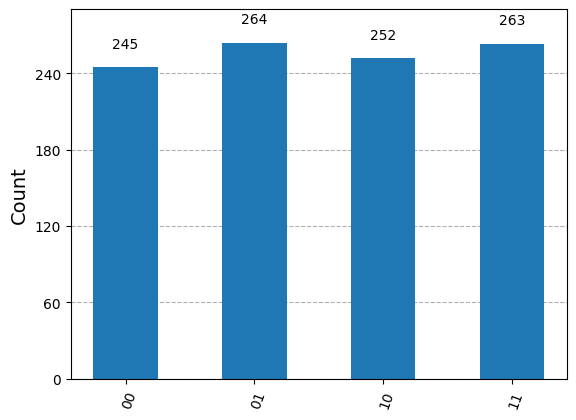

In [11]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)

In [13]:
samples = psi.sample_memory(shots=10)
print(samples)

['01' '01' '01' '00' '10' '00' '01' '10' '01' '10']


In [15]:
O = qi.SparsePauliOp(['ZZ','XX','II'],[0.2,-0.3,0.4])
O.to_operator()

Operator([[ 0.6+0.j,  0. +0.j,  0. +0.j, -0.3+0.j],
          [ 0. +0.j,  0.2+0.j, -0.3+0.j,  0. +0.j],
          [ 0. +0.j, -0.3+0.j,  0.2+0.j,  0. +0.j],
          [-0.3+0.j,  0. +0.j,  0. +0.j,  0.6+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [18]:
O_exp = psi.expectation_value(O)
print(O_exp)

(0.10000000000000003+0j)


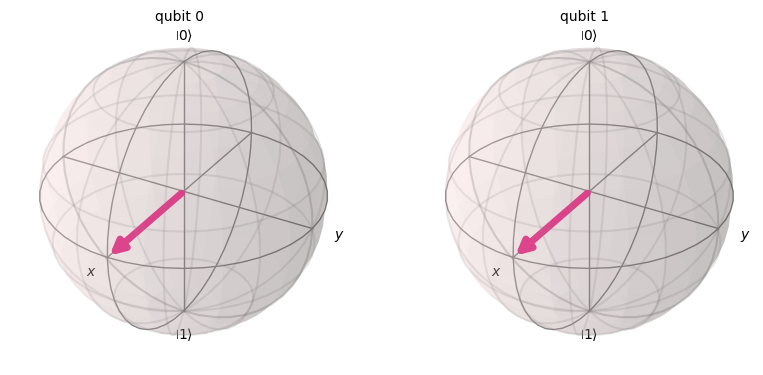

In [19]:
psi.draw('bloch')

In [20]:
rho = qi.DensityMatrix(qc)
rho

DensityMatrix([[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j],
               [0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j],
               [0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j],
               [0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j]],
              dims=(2, 2))


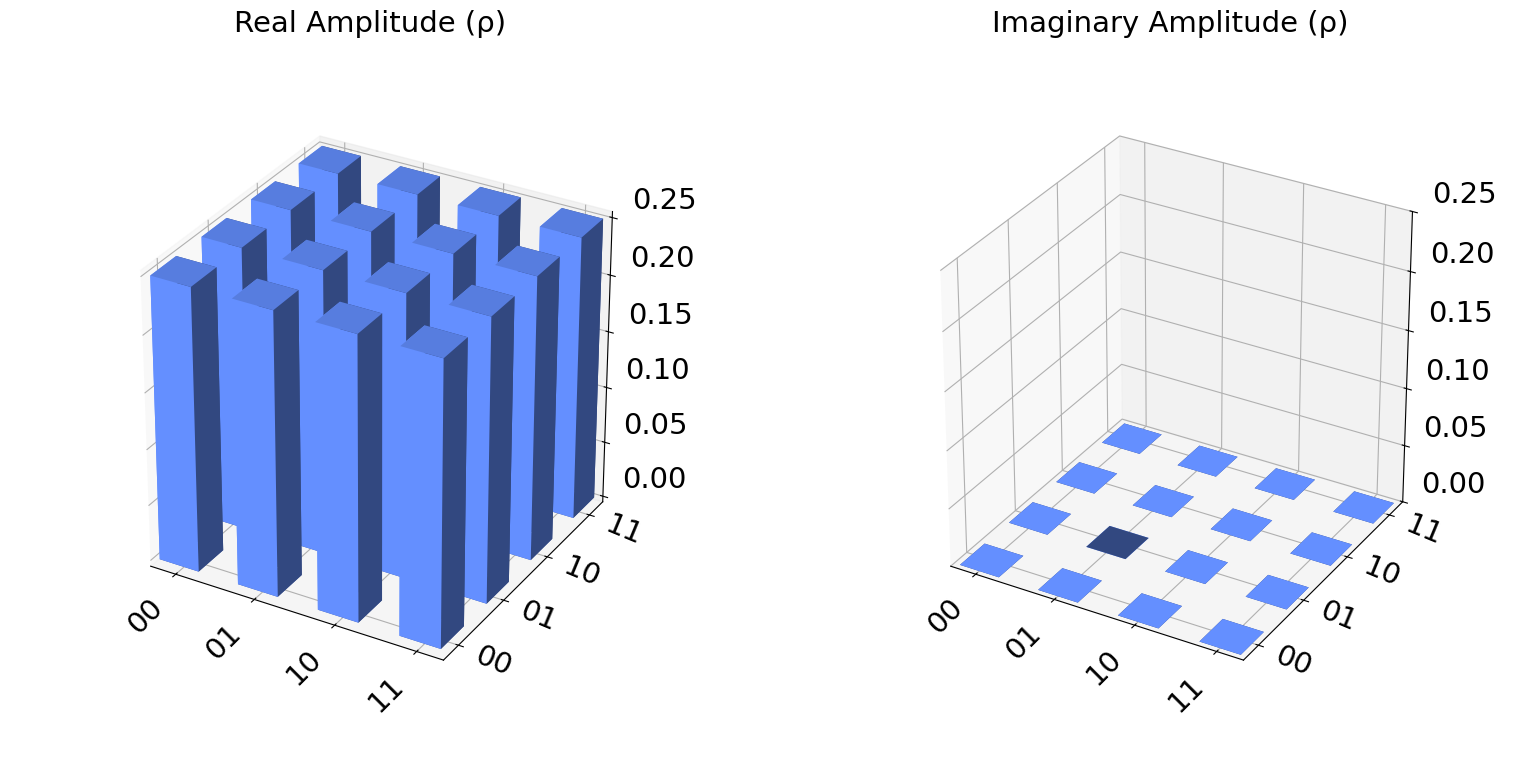

In [21]:
rho.draw('city')

In [22]:
rho1 = qi.partial_trace(rho,[0]) # Input qubit to be traced out
rho1

DensityMatrix([[0.5+0.j, 0.5+0.j],
               [0.5+0.j, 0.5+0.j]],
              dims=(2,))


In [23]:
U = qi.Operator(qc)
U

Operator([[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j],
          [ 0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j],
          [ 0.5+0.j,  0.5+0.j, -0.5+0.j, -0.5+0.j],
          [ 0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


We cannot use Quantum Info module if our circuit has a measurement!!

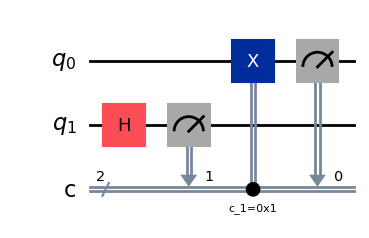

In [27]:
qc = QuantumCircuit(2,2)
qc.h(1)
qc.measure(1,1)
qc.x(0).c_if(1,1)
qc.measure(0,0)
qc.draw('mpl')

### This produces an error that we cannot apply Statevector to a circuit with measurements.

In [30]:
qi.Statevector(qc)

QiskitError: 'Cannot apply instruction with classical bits: measure'

### Summary
- Use it to Find the statevector/density matrix at the output of a circuit
- Find probabilities of outcomes
- Sample from state to get counts or actual measurements of running the circuit several times
- Find expectation value wrt a given observable
- Partial Trace of the Density Matrix
- Plot state on bloch sphere or qsphere to represent results
- Find unitary of a circuit for analyzing the states of the outcome

Don't use if:
- Circuit is large (many qubits, many gates) becuase the circuit is not optimized and relies on basis linear algebra to perform state manipulation of matrices. Thus, if the matrices are too large thenit could take a really long time and we might not be able to compute the results
- Circuit has classical registers or mid-circuit measurements in our circuit.

Thus, we will now start looking at other simulators included in the Qiskit package

## Simulate Circuits using Basic Simulator

First it was known as basic aer simulator but it has been renamed. Even though it is an inefficient simulator, it allows us to implement circuits that have mid circuit measurements.

In [35]:
from qiskit import QuantumCircuit
from qiskit.providers.basic_provider import BasicSimulator

simulator_basic = BasicSimulator()

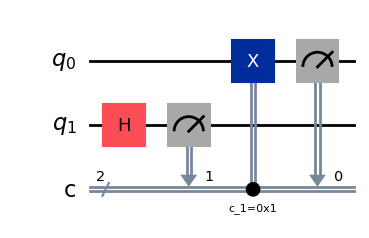

In [36]:
qc = QuantumCircuit(2,2)
qc.h(1)
qc.measure(1,1)
qc.x(0).c_if(1,1)
qc.measure(0,0)
qc.draw('mpl')

In [37]:
job = simulator_basic.run(qc, shots=1024)
result = job.result()
print(result)

Result(backend_name='basic_simulator', backend_version='0.1', qobj_id='6b7cf3d3-c389-487b-854a-4b12b4012953', job_id='6126fe2c-da87-4a75-b20b-e01485a69c91', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3': 491, '0x0': 533}), header=QobjExperimentHeader(qubit_labels=[['q', 0], ['q', 1]], n_qubits=2, qreg_sizes=[['q', 2]], clbit_labels=[['c', 0], ['c', 1]], memory_slots=2, creg_sizes=[['c', 2]], name='circuit-180', global_phase=0.0, metadata={}), status=DONE, name='circuit-180', seed_simulator=np.int32(127836160), time_taken=0.8922765254974365)], date=None, status=COMPLETED, header=QobjHeader(backend_name='basic_simulator', backend_version='0.1'), time_taken=0.897409200668335)


In [38]:
counts = result.get_counts()
print(counts)

{'11': 491, '00': 533}


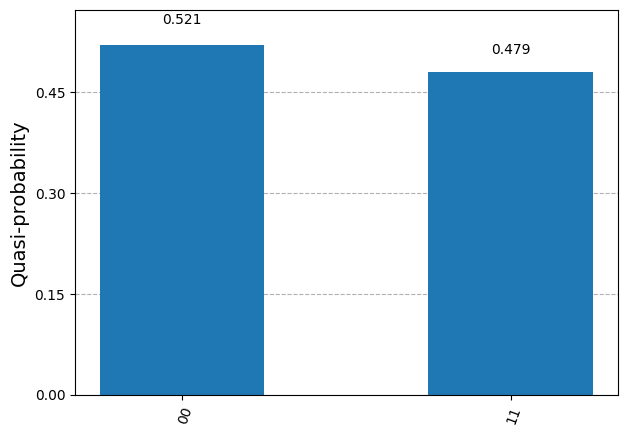

In [40]:
from qiskit.visualization import plot_distribution
plot_distribution(counts)

In [42]:
job = simulator_basic.run(qc, shots=10, memory=True)
result = job.result()
samples=result.get_memory()
print(samples)

['11', '11', '00', '11', '00', '00', '11', '00', '11', '00']


An important thing about using this type of simulators in qiskit i that they usually rely on a set of basic Gates that they can simulate. So if we import QFT from qiskit circuit library
and do the following:

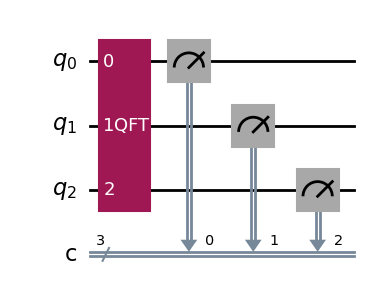

In [43]:
from qiskit.circuit.library import QFT
qc=QuantumCircuit(3,3)
qc.append(QFT(3),range(3))
qc.measure(range(3),range(3))
qc.draw('mpl')

In [45]:
job = simulator_basic.run(qc, shots=1024)

BasicProviderError: 'basic_simulator encountered unrecognized operation "QFT"'

Note that the error says the basic simulator does not recognize the qft operation that's because this qft is not part of the basis gates that the simulator can run. Thus, we need to transpile our circuits. Transpiling is Taking a certian type of circuit and converting it into a circuit that only uses the basis gates that the simulator/backend can run.

In [47]:
from qiskit import transpile
qc_t = transpile(qc, backend=simulator_basic)
job = simulator_basic.run(qc_t, shots=1024)

In [48]:
result = job.result()
counts = result.get_counts()
print(counts)

{'111': 124, '010': 112, '100': 105, '011': 127, '001': 148, '101': 147, '110': 132, '000': 129}


## Summary:
Use it to:
- find counts/samples of circuit with mid-circuit measurements

Don't use if:
- Circuit is large (many qubits, many gates) since it's an inefficient implementation of the circuit
- Need to find coherent states (statevector/density matrix) at the output of the circuit. We can extract the results stored in the classical registers like the number of counts or the samples. But, we can't get the state vetor even after the measurement has projected their result.
- Need to add noise to the simulation

Thus, now we move on to the next simulator which is the aer simulator.

## Aer Simulator

In [49]:
from qiskit_aer import AerSimulator

simulator_aer=AerSimulator()

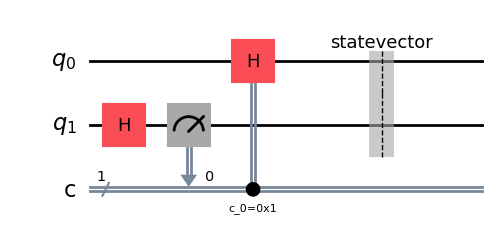

In [50]:
qc = QuantumCircuit(2,1)
qc.h(1)
qc.measure(1,0)
qc.h(0).c_if(0,1)
qc.save_statevector()
qc.draw('mpl')

In [55]:
qc_aer = transpile(qc, backend=simulator_aer)

result = simulator_aer.run(qc_aer).result()
psi = result.get_statevector()
psi.draw("latex")

<IPython.core.display.Latex object>

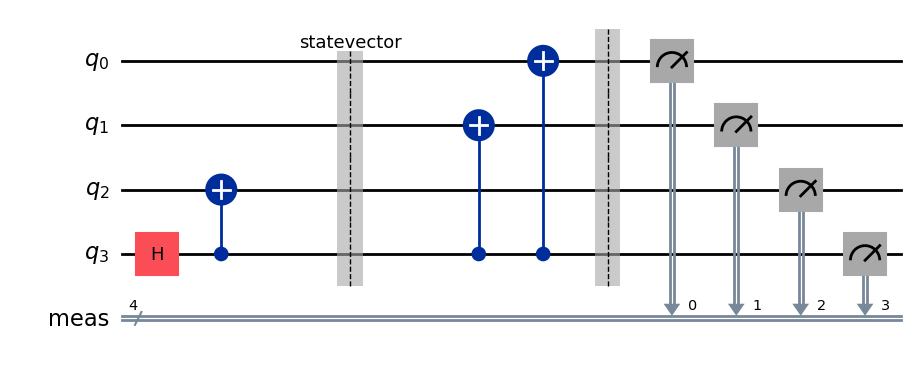

In [57]:
qc = QuantumCircuit(4)
qc.h(3)
qc.cx(3,2)
qc.save_statevector()
qc.cx(3,1)
qc.cx(3,0)
qc.measure_all()
qc.draw('mpl')

In [58]:
qc_aer = transpile(qc, backend=simulator_aer)

result = simulator_aer.run(qc_aer).result()
psi = result.get_statevector()
psi.draw("latex")

<IPython.core.display.Latex object>

## Efficient Simulators

In [68]:
n=50
qc = QuantumCircuit(n)
qc.h(n-1)
for i in range(n-1,0,-1):
    qc.cx(i,i-1)

qc.measure_all()
#qc.draw('mpl')

In [64]:
%%time

result = simulator_basic.run(qc,shots = 1024).result()
counts = result.get_counts()
print(counts)

{'111111111111111111111111': 514, '000000000000000000000000': 510}
CPU times: total: 5.27 s
Wall time: 31.9 s


In [65]:
%%time

result = simulator_aer.run(qc,shots=1024).result()
# method defaults to the chosen by itself but we can force the method
counts = result.get_counts()
print(counts)

{'111111111111111111111111': 508, '000000000000000000000000': 516}
CPU times: total: 62.5 ms
Wall time: 214 ms


In [69]:
%%time

result = simulator_aer.run(qc,shots=1024,method='statevector').result()
# method defaults to the chosen by itself but we can force the method
counts = result.get_counts()
print(counts)

QiskitError: 'ERROR:  [Experiment 0] Insufficient memory to run circuit circuit-205 using the statevector simulator. Required memory: 17179869184M, max memory: 7876M ,  ERROR: Insufficient memory to run circuit circuit-205 using the statevector simulator. Required memory: 17179869184M, max memory: 7876M'

In [70]:
%%time

result = simulator_aer.run(qc,shots=1024,method='matrix_product_state').result()
# method defaults to the chosen by itself but we can force the method
counts = result.get_counts()
print(counts)

{'00000000000000000000000000000000000000000000000000': 506, '11111111111111111111111111111111111111111111111111': 518}
CPU times: total: 953 ms
Wall time: 393 ms


## Noise

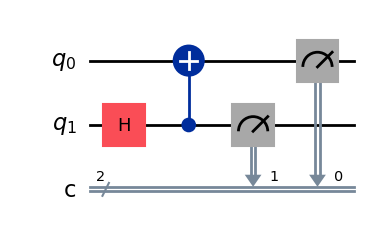

In [73]:
qc = QuantumCircuit(2,2)
qc.h(1)
qc.cx(1,0)
qc.measure([1,0],[1,0])
qc.draw('mpl')

In [75]:
qc_aer = transpile(qc,backend=simulator_aer)
result_ideal = simulator_aer.run(qc_aer,shots=1024).result()
counts_ideal = result_ideal.get_counts()

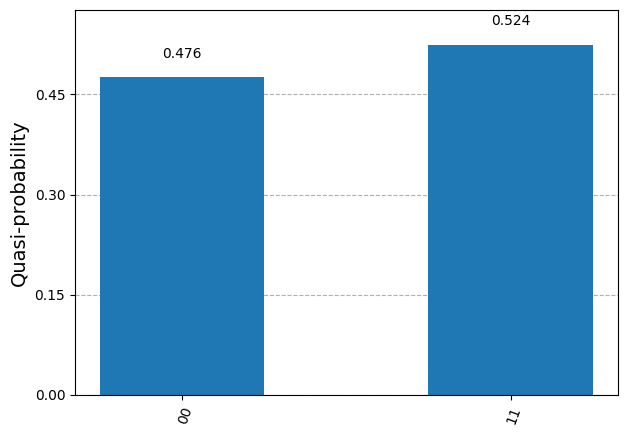

In [77]:
from qiskit.visualization import plot_distribution

plot_distribution(counts_ideal)

In [79]:
from qiskit_aer import noise

In [81]:
prob=0.1
error = noise.depolarizing_error(prob,2)

noise_model = noise.NoiseModel()
noise_model.add_all_qubit_quantum_error(error,'cx')
basis_gates = noise_model.basis_gates

result_noisy = simulator_aer.run(qc_aer,shots=1024,noise_model=noise_model,basis_gtes=basis_gates).result()
counts_noisy = result_noisy.get_counts()

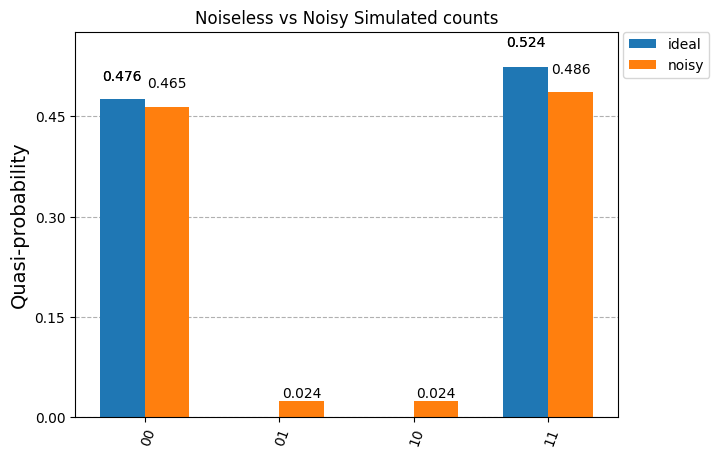

In [83]:
plot_distribution([counts_ideal,counts_noisy],legend=['ideal','noisy'],title='Noiseless vs Noisy Simulated counts')

Aer Simulator
Use it to:
- Find coutns/samples of large circuits (simulations are efficient)
- Find statevctor/density matrix f circuit with measurements
- Need to simulte circuits with noise


Don't use if:
- Need to match the output format of Qiskit IBM runtime
- Qiskit Aer has its own Sampler/Estimator bit they are V1(old version as of May 2024) and are deprecated

## Primitives


In [87]:
from qiskit_ibm_provider import IBMProvider

qc  = QuantumCircuit(2)
qc.h(1)
qc.ch(1,0)
qc.measure_all()
qc.draw('mpl')

ModuleNotFoundError: No module named 'qiskit_ibm_provider'

In [86]:
qpu_osk = IBMProvider().get_backend('ibm_osaka')
qc_osk = transpile(qc,backend=qpu_osk)


NameError: name 'IBMProvider' is not defined

In [32]:
psi = qi.Statevector(qc)
psi.draw('latex')

<IPython.core.display.Latex object>